<a href="https://colab.research.google.com/github/axellebersier/2022_ML_EES/blob/main/project/datadescrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Machine Learning : Feature selection for population dynamic analysis**


##Problematic

What are the important features to consider to analyze the population dynamic of Switzerland ? 

##Data description

Set up and load the data

In [252]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [253]:
import pandas as pd
url = 'https://raw.githubusercontent.com/axellebersier/2022_ML_EES/main/project/data.csv'
df = pd.read_csv(url, delimiter=';')



##Data Description

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N_communes         2198 non-null   object 
 1   N_pop              2198 non-null   float64
 2   D_pop              2198 non-null   float64
 3   N_kids             2198 non-null   float64
 4   W_pop              2198 non-null   float64
 5   N_retired          2198 non-null   float64
 6   N_foreigners       2198 non-null   float64
 7   Natural_growth     2198 non-null   float64
 8   N_wedding          2198 non-null   float64
 9   N_death            2198 non-null   float64
 10  Prop_fam           2198 non-null   float64
 11  M_home             2198 non-null   float64
 12  S_primary          2198 non-null   object 
 13  S_tertiary         2198 non-null   object 
 14  N_nlog             2198 non-null   float64
 15  N_indivihome       2198 non-null   float64
 16  little_house       2198 

In [255]:
df.describe()

,N_pop,D_pop,N_kids,W_pop,N_retired,N_foreigners,Natural_growth,N_wedding,N_death,Prop_fam,M_home,N_nlog,N_indivihome,little_house,N_cinema,Migratory_balance
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.00000,2198.000000,2198.000000
mean,3944.631483,441.098908,785.396269,2417.802093,741.433121,1005.818016,4.421747,15.996360,34.665605,6.354959,2.304613,22.435851,59.383258,50.47434,0.119654,8.297316
std,12832.581553,795.711671,2315.055711,8463.505065,2090.630990,4498.971352,42.836565,61.877402,116.070124,2.481014,0.188803,65.231776,13.611301,8.10201,0.665671,20.955043
min,32.000000,0.800000,1.000000,19.000000,5.000000,0.000000,-275.000000,0.000000,0.000000,0.000000,1.520000,0.000000,0.000000,15.70000,0.000000,-107.000000
25%,721.250000,82.700000,143.000000,429.250000,139.000000,80.000000,-3.000000,2.000000,5.000000,4.800000,2.190000,1.000000,51.425000,45.20000,0.000000,-3.100000
50%,1555.500000,185.750000,328.000000,957.000000,311.000000,231.000000,1.000000,6.000000,13.000000,6.000000,2.300000,5.000000,61.500000,50.60000,0.000000,6.200000
75%,3843.750000,470.725000,798.750000,2310.250000,738.500000,755.500000,7.000000,15.000000,31.000000,7.500000,2.420000,21.000000,68.900000,56.00000,0.000000,17.875000
max,421878.000000,12797.000000,74392.000000,285786.000000,61700.000000,136743.000000,1574.000000,2212.000000,3605.000000,28.600000,3.220000,1772.000000,96.200000,85.80000,17.000000,141.900000


In [256]:
df.head()

,N_communes,N_pop,D_pop,N_kids,W_pop,N_retired,N_foreigners,Natural_growth,N_wedding,N_death,Prop_fam,M_home,S_primary,S_tertiary,N_nlog,N_indivihome,little_house,N_social,N_cinema,Migratory_balance
0,Aeugst am Albis,2014.0,254.6,382.0,1258.0,374.0,290.0,-2.0,5.0,12.0,4.7,2.28,14.00,108.00,10.0,69.2,42.3,26.00,0.0,14.5
1,Affoltern am Albis,12289.0,1160.4,2482.0,7523.0,2284.0,3564.0,26.0,59.0,125.0,5.5,2.19,23.00,857.00,56.0,54.7,60.9,392.00,1.0,-0.5
2,Bonstetten,5610.0,755.0,1350.0,3327.0,933.0,971.0,26.0,26.0,35.0,5.2,2.37,16.00,235.00,1.0,71.6,55.3,63.00,0.0,0.5
3,Hausen am Albis,3801.0,279.5,840.0,2270.0,691.0,602.0,8.0,10.0,19.0,6.7,2.39,34.00,199.00,5.0,69.1,43.7,47.00,0.0,10.9
4,Hedingen,3795.0,581.2,820.0,2330.0,645.0,659.0,2.0,7.0,20.0,6.5,2.38,11.00,158.00,4.0,74.7,47.6,48.00,0.0,2.1


In [257]:
#df1 <- np.asmatrix(df[2:7,:])
df1 =  df.iloc[:,[2,3,4,5,6,7,8,9,10,11,14,15,16,18,19]]
df1.head()

df1 = np.asmatrix(df1)
print(df1)


[[ 2.5460e+02  3.8200e+02  1.2580e+03 ...  4.2300e+01  0.0000e+00
   1.4500e+01]
 [ 1.1604e+03  2.4820e+03  7.5230e+03 ...  6.0900e+01  1.0000e+00
  -5.0000e-01]
 [ 7.5500e+02  1.3500e+03  3.3270e+03 ...  5.5300e+01  0.0000e+00
   5.0000e-01]
 ...
 [ 2.0500e+01  2.3000e+02  7.1900e+02 ...  4.9500e+01  0.0000e+00
   7.9000e+00]
 [ 2.6800e+01  1.8700e+02  6.0500e+02 ...  4.7300e+01  0.0000e+00
   1.2800e+01]
 [ 3.6500e+01  2.3500e+02  6.2200e+02 ...  4.3500e+01  0.0000e+00
  -9.7000e+00]]


In [258]:
df1 = pd.DataFrame(df1)
corr_matrix = df1.corr()
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.507885  0.479303  0.510345  0.533100  0.298850  0.430725   
1   0.507885  1.000000  0.995221  0.985010  0.973496  0.777000  0.976547   
2   0.479303  0.995221  1.000000  0.982803  0.976562  0.791325  0.987465   
3   0.510345  0.985010  0.982803  1.000000  0.955666  0.683809  0.965585   
4   0.533100  0.973496  0.976562  0.955666  1.000000  0.760704  0.941474   
5   0.298850  0.777000  0.791325  0.683809  0.760704  1.000000  0.806933   
6   0.430725  0.976547  0.987465  0.965585  0.941474  0.806933  1.000000   
7   0.490581  0.984636  0.987278  0.993093  0.965907  0.691983  0.971690   
8  -0.128236 -0.079117 -0.088127 -0.119990 -0.078004  0.012477 -0.087554   
9  -0.140038 -0.133529 -0.144196 -0.187857 -0.138050  0.018671 -0.144423   
10  0.449872  0.780196  0.768271  0.759484  0.729997  0.624347  0.765675   
11 -0.154556 -0.174866 -0.175708 -0.186219 -0.180827 -0.109215 -0.170031   
12  0.232738

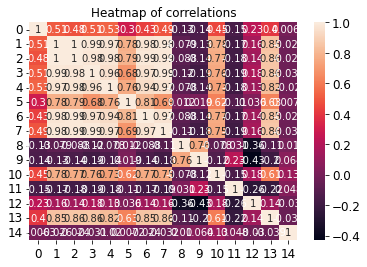

In [259]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (10,15)
plt.show()


##Analysis with KMeans

In [260]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [261]:
df1.shape

(2198, 15)

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stdf1 = scaler.fit_transform(df1)
print(stdf1)
df = pd.DataFrame(stdf1)
print(df)
df.to_csv('data_standardized', index = False, sep='\t')
df.shape

[[-0.23443334 -0.17428871 -0.13706685 ... -1.00915699 -0.17979062
   0.29606695]
 [ 0.90417773  0.73302331  0.60333864 ...  1.28709192  1.32279409
  -0.41991408]
 [ 0.39458077  0.24393893  0.10745014 ...  0.59574816 -0.17979062
  -0.37218201]
 ...
 [-0.52870233 -0.23996081 -0.20076654 ... -0.12028644 -0.17979062
  -0.0189647 ]
 [-0.52078309 -0.25853911 -0.21423921 ... -0.39188578 -0.17979062
   0.21492244]
 [-0.50858997 -0.23780055 -0.21223013 ... -0.8610119  -0.17979062
  -0.85904912]]
            0         1         2         3         4         5         6   \
0    -0.234433 -0.174289 -0.137067 -0.175792 -0.159143 -0.149947 -0.177752   
1     0.904178  0.733023  0.603339  0.738015  0.568744  0.503849  0.695139   
2     0.394581  0.243939  0.107450  0.091652 -0.007741  0.503849  0.161705   
3    -0.203133  0.023592 -0.017467 -0.024129 -0.089778  0.083552 -0.096929   
4     0.176110  0.014951 -0.010377 -0.046137 -0.077106 -0.056547 -0.145423   
...        ...       ...       ...      

(2198, 15)

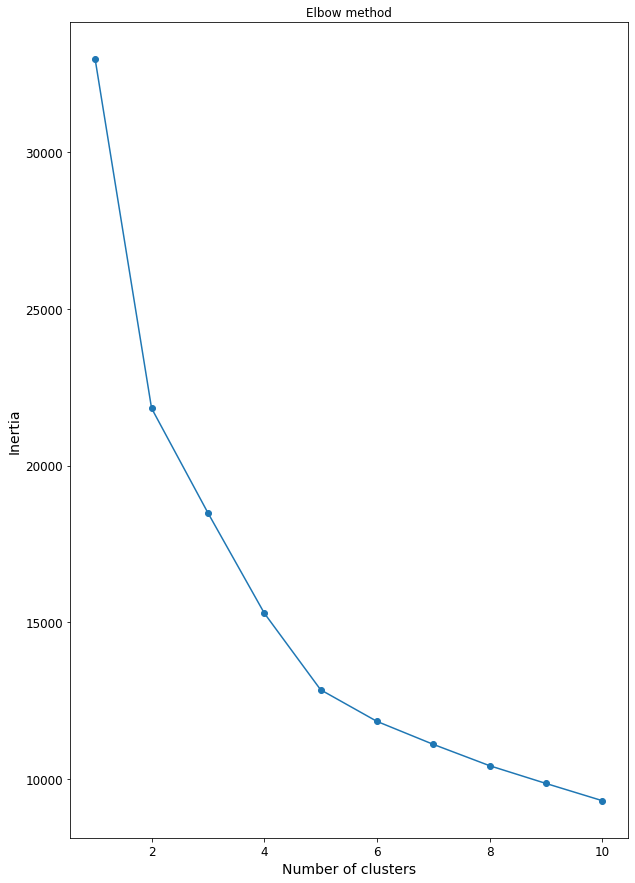

In [263]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stdf1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [264]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(stdf1)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(stdf1, cluster_labels))
silhouette_ann

[0.917773553767358,
 0.8950405803479088,
 0.18521621393872822,
 0.19262608037798584,
 0.1424040509817486,
 0.15229245429886723,
 0.14855731424297328,
 0.1546754390830279]

In [265]:
num_clusters
Ncluster = range(2,10)
Ncluster
silhouette_ann

[0.917773553767358,
 0.8950405803479088,
 0.18521621393872822,
 0.19262608037798584,
 0.1424040509817486,
 0.15229245429886723,
 0.14855731424297328,
 0.1546754390830279]

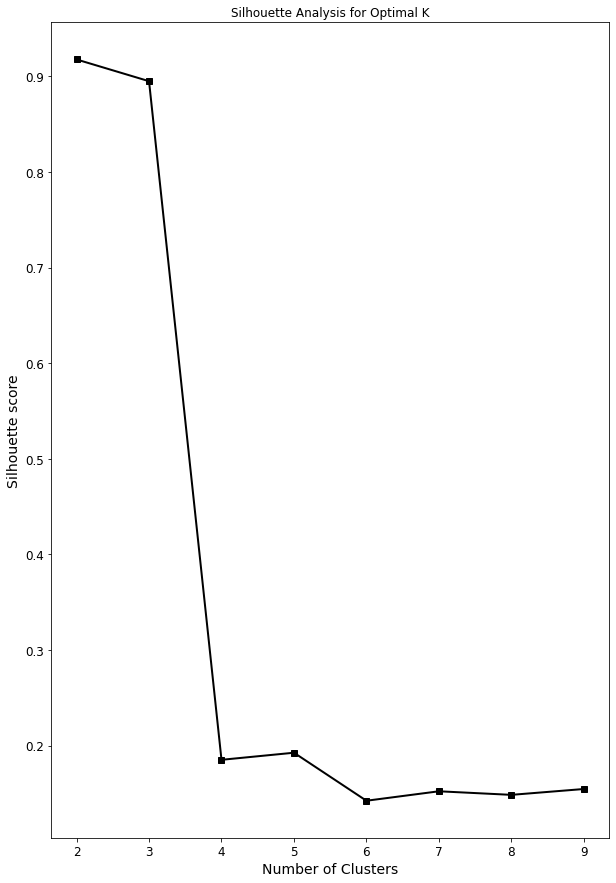

In [266]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [267]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(stdf1)
print(kmeans)

y_kmean = kmeans.predict(stdf1)
#result = np.vstack((stdf1,y_kmean))

KMeans(n_clusters=5)


https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation 

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stdf1 = scaler.fit_transform(df1)
print(stdf1)
df = pd.DataFrame(stdf1)
print(df)
df.to_csv('data_standardized', index = False, sep='\t')
df.shape

[[-0.23443334 -0.17428871 -0.13706685 ... -1.00915699 -0.17979062
   0.29606695]
 [ 0.90417773  0.73302331  0.60333864 ...  1.28709192  1.32279409
  -0.41991408]
 [ 0.39458077  0.24393893  0.10745014 ...  0.59574816 -0.17979062
  -0.37218201]
 ...
 [-0.52870233 -0.23996081 -0.20076654 ... -0.12028644 -0.17979062
  -0.0189647 ]
 [-0.52078309 -0.25853911 -0.21423921 ... -0.39188578 -0.17979062
   0.21492244]
 [-0.50858997 -0.23780055 -0.21223013 ... -0.8610119  -0.17979062
  -0.85904912]]
            0         1         2         3         4         5         6   \
0    -0.234433 -0.174289 -0.137067 -0.175792 -0.159143 -0.149947 -0.177752   
1     0.904178  0.733023  0.603339  0.738015  0.568744  0.503849  0.695139   
2     0.394581  0.243939  0.107450  0.091652 -0.007741  0.503849  0.161705   
3    -0.203133  0.023592 -0.017467 -0.024129 -0.089778  0.083552 -0.096929   
4     0.176110  0.014951 -0.010377 -0.046137 -0.077106 -0.056547 -0.145423   
...        ...       ...       ...      

(2198, 15)